In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const


In [84]:
# Schottky current due to thermal. from svennson
#thermal voltage, defined as Kb*T/e
VT=300*const.Boltzmann/const.elementary_charge
richardson_const=4*np.pi*const.electron_mass*const.elementary_charge*const.Boltzmann**2/const.h**3

def svennson_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    
    
    sb0=sb0+vg
    sbe=sb0
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J
def chiquito_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    sb0=sb0+vg
    sbe=sb0+vd*(1/n-1)
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J 

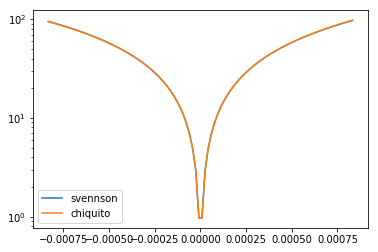

In [85]:
vds=0.1/120
x=np.linspace(-vds,vds,100)
y_svennson=[abs(svennson_current_density(i,0)) for i in x]
y_chiquito=[abs(chiquito_current_density(i,0)) for i in x]
plt.semilogy(x,y_svennson, label="svennson")
plt.semilogy(x,y_chiquito, label="chiquito")
plt.legend()

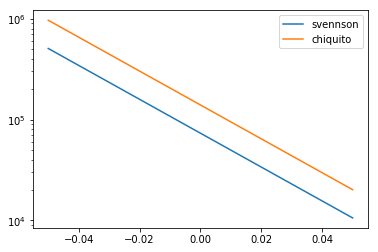

In [100]:
vds=0.1
vg=0.05
x=np.linspace(-vg,vg,100)
y_svennson=[svennson_current_density(vds,i) for i in x]
y_chiquito=[chiquito_current_density(vds,i) for i in x]
plt.semilogy(x,y_svennson, label="svennson")
plt.semilogy(x,y_chiquito, label="chiquito")
plt.legend()

In [36]:
t=[-1,2,3,4]
[i if i>0 else 0 for i in t ]

[0, 2, 3, 4]